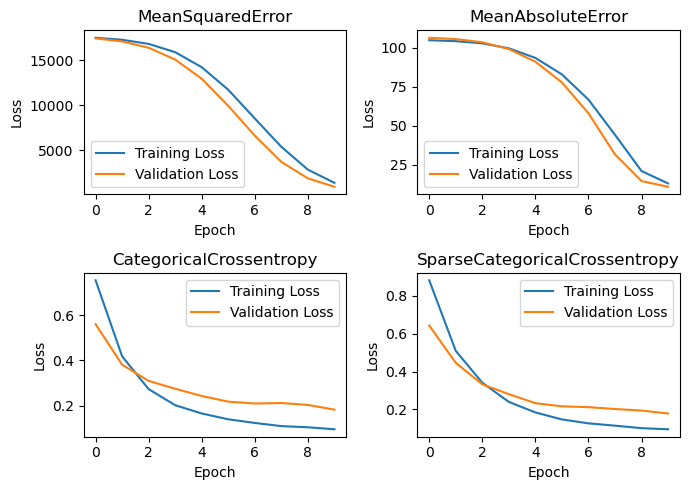

In [14]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError, SparseCategoricalCrossentropy, CategoricalCrossentropy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_classification, make_regression
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action="ignore")

# Regression data generation
X_reg, y_reg = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split data into train and test sets for regression
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Categorical data generation
X_cat, y_cat_int = make_classification(n_samples=1000, n_features=10, n_informative=5,
                                                           n_classes=3, n_clusters_per_class=1, random_state=42)

# Convert integer labels to one-hot encoding for categorical task
one_hot_encoder = OneHotEncoder(sparse=False)
y_cat = one_hot_encoder.fit_transform(y_cat_int.reshape(-1, 1))

# Split data into train and test sets for categorical task
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, y_cat, test_size=0.2, random_state=42)

# Convert one-hot encoded target to integer target for SparseCategoricalCrossentropy
y_cat_train_int = y_cat_train.argmax(axis=1)
y_cat_test_int = y_cat_test.argmax(axis=1)

# Define neural network architectures
def create_regression_model(loss_function):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(10,)),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss=loss_function)
    return model

def create_categorical_model(loss_function):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(10,)),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
    return model

# Define loss functions
regression_losses = [MeanSquaredError(), MeanAbsoluteError()]
categorical_losses = [CategoricalCrossentropy(), SparseCategoricalCrossentropy()]

def plot_convergence(history, loss_name, ax):
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'{loss_name}')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()

# Create facet plots
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

# Train and evaluate regression models with different loss functions
for i, loss_func in enumerate(regression_losses):
    model_reg = create_regression_model(loss_func)
    history_reg = model_reg.fit(X_reg_train, y_reg_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_reg_test, y_reg_test))
    plot_convergence(history_reg, loss_func.__class__.__name__, axs[0, i])

# Train and evaluate categorical models with different loss functions
for i, loss_func in enumerate(categorical_losses):
    model_cat = create_categorical_model(loss_func)
    if isinstance(loss_func, SparseCategoricalCrossentropy):
        history_cat = model_cat.fit(X_cat_train, y_cat_train_int, epochs=10, batch_size=32, verbose=0, validation_data=(X_cat_test, y_cat_test_int))
    else:
        history_cat = model_cat.fit(X_cat_train, y_cat_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_cat_test, y_cat_test))
    plot_convergence(history_cat, loss_func.__class__.__name__, axs[1, i])

plt.tight_layout()
plt.show()

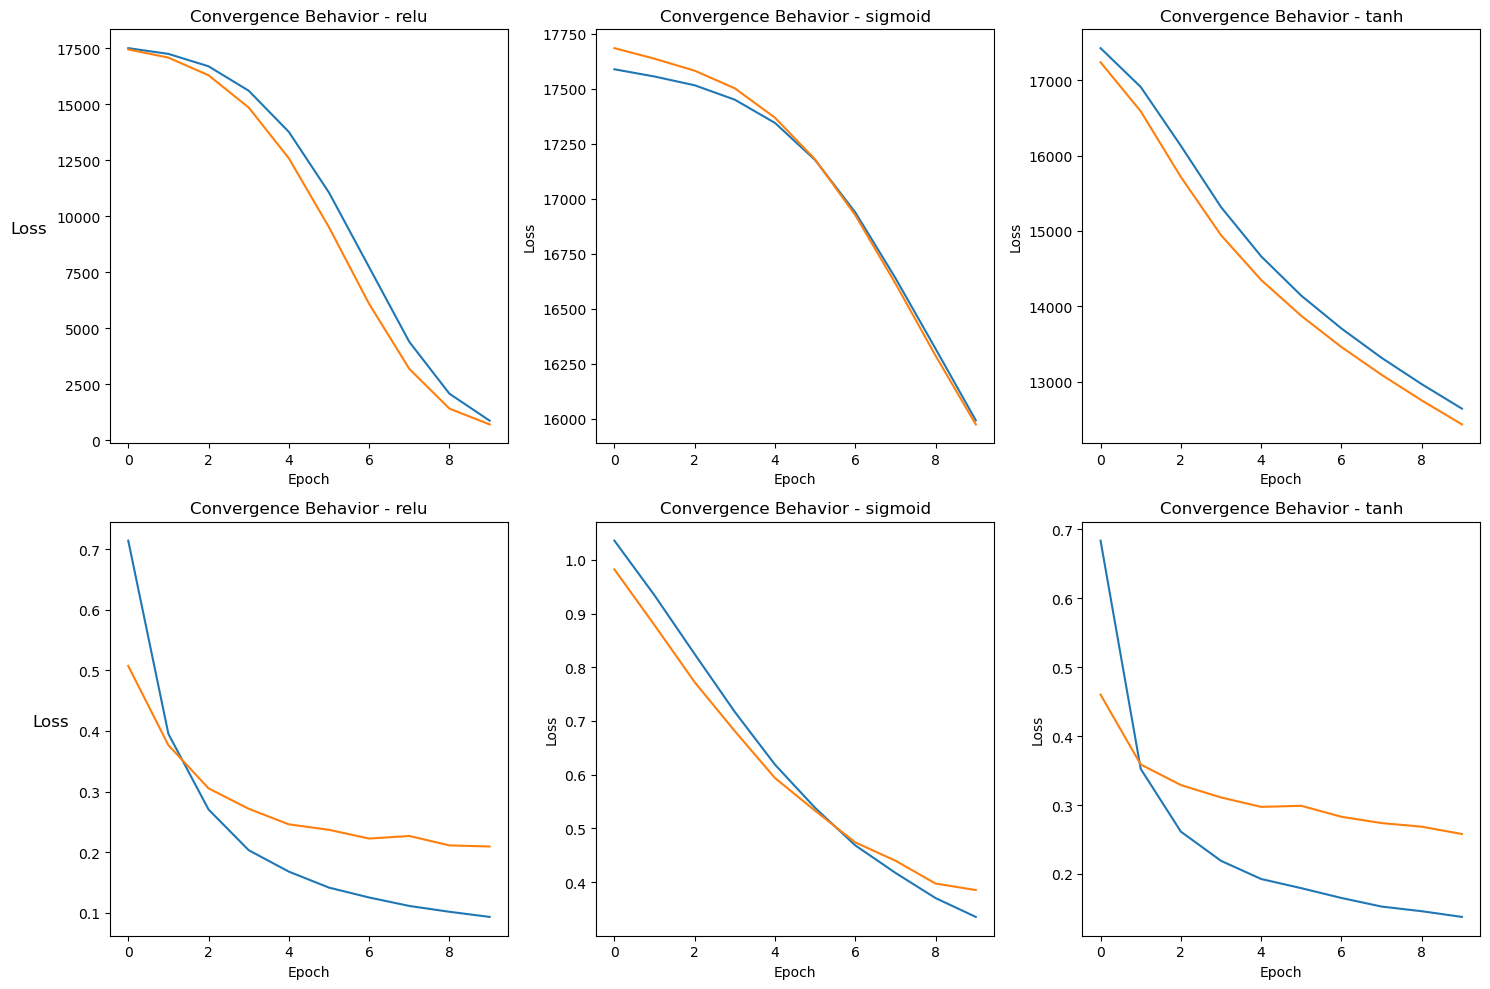

In [13]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError, SparseCategoricalCrossentropy
from tensorflow.keras.activations import relu, sigmoid, tanh
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_classification, make_regression
import matplotlib.pyplot as plt

# Regression data generation
X_reg, y_reg = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)

# Split data into train and test sets for regression
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Categorical data generation
X_cat, y_cat_int = make_classification(n_samples=1000, n_features=10, n_informative=5,
                                                           n_classes=3, n_clusters_per_class=1, random_state=42)

# Convert integer labels to one-hot encoding for categorical task
one_hot_encoder = OneHotEncoder(sparse=False)
y_cat = one_hot_encoder.fit_transform(y_cat_int.reshape(-1, 1))

# Split data into train and test sets for categorical task
X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, y_cat, test_size=0.2, random_state=42)

# Convert one-hot encoded target to integer target for SparseCategoricalCrossentropy
y_cat_train_int = y_cat_train.argmax(axis=1)
y_cat_test_int = y_cat_test.argmax(axis=1)

# Define neural network architectures with different activation functions
def create_regression_model(activation_function):
    model = Sequential([
        Dense(64, activation=activation_function, input_shape=(10,)),
        Dense(64, activation=activation_function),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss=MeanSquaredError())
    return model

def create_categorical_model(activation_function):
    model = Sequential([
        Dense(64, activation=activation_function, input_shape=(10,)),
        Dense(64, activation=activation_function),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])
    return model

# Define activation functions to compare
activation_functions = [relu, sigmoid, tanh]

def plot_convergence(history, activation_function, ax):
    ax.plot(history.history['loss'], label='Training Loss')
    ax.plot(history.history['val_loss'], label='Validation Loss')
    ax.set_title(f'Convergence Behavior - {activation_function}')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')

# Create facet plots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Label rows in facet plots
for i, row_label in enumerate(['Regression', 'Categorical']):
    axs[i, 0].set_ylabel(row_label, rotation=0, size='large', labelpad=20)

# Train and evaluate regression models with different activation functions
for i, activation_func in enumerate(activation_functions):
    model_reg = create_regression_model(activation_func)
    history_reg = model_reg.fit(X_reg_train, y_reg_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_reg_test, y_reg_test))
    plot_convergence(history_reg, activation_func.__name__, axs[0, i])

# Train and evaluate categorical models with different activation functions
for i, activation_func in enumerate(activation_functions):
    model_cat = create_categorical_model(activation_func)
    history_cat = model_cat.fit(X_cat_train, y_cat_train_int, epochs=10, batch_size=32, verbose=0, validation_data=(X_cat_test, y_cat_test_int))
    plot_convergence(history_cat, activation_func.__name__, axs[1, i])

plt.tight_layout()
plt.show()
